In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def read_df(task, filtr_col=None, filtr=None):
    df = pd.read_csv('../results-dump/distance-based/results-noise-and-variance/results_' + task + '.csv')
    exclude = ['ORACLE', 'DEM', 'BAU']
    df = df[df['method'].map(lambda x: x not in exclude)]
    if filtr_col and filtr:
        df = df[df[filtr_col].map(filtr)]
    return df

In [23]:
def plot_noise_and_variance(task, filtr_col=None, filtr=None):
    df = read_df(task, filtr_col, filtr)
    cols = df['suffix'].nunique()
    fig, axs = plt.subplots(1, cols, figsize=(15, 3), sharey=True)
    fig.suptitle('Accuracy vs Noise by Variance', y=1.08)

#     df = df[df['suffix'] != 'var0.2']
    ax = 0
    for suffix in df['suffix'].unique():
        for supervision in df['supervision_amt'].unique():
            df_new = df[(df['suffix'] == suffix) & (df['supervision_amt'] == supervision)]
            df_new = df_new[['method', 'acc', 'noise']]
            df_new = df_new.groupby(['method', 'noise']).mean().reset_index()
            df_new = df_new.pivot_table(values='acc', columns='method', index='noise')
            for method in df['method'].unique():
                try:
                    axs[ax].plot(df_new.index, df_new[method], label=(method + "-" + str(supervision)))
                except:
                    pass
            subplot_title = "Variance: " + suffix.strip("var")
            axs[ax].title.set_text(subplot_title)
            axs[ax].set_xlabel('mean worker accuracy')
        ax += 1

    axs[0].set_ylabel('model accuracy')
    axs[cols - 1].legend(loc="upper left", ncol=2, shadow=True, bbox_to_anchor=[0, 1.5])

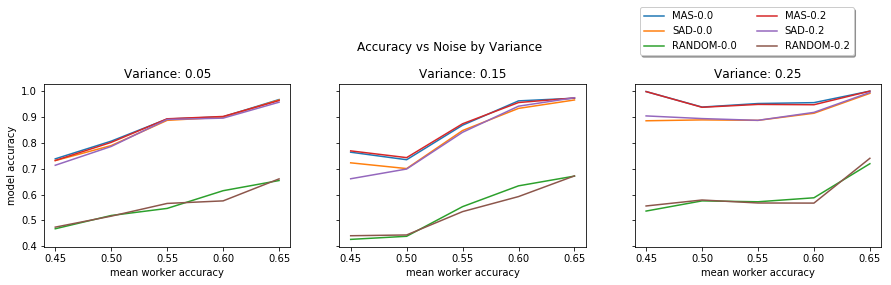

In [17]:
plot_noise_and_variance('face')

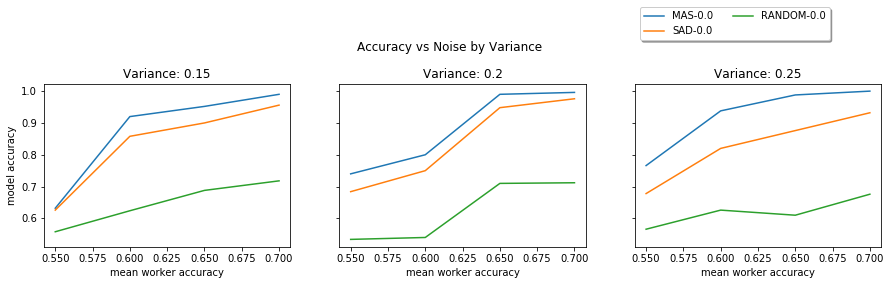

In [18]:
filtr = lambda x: x > 0.5
filtr_col = 'noise'
plot_noise_and_variance('movie', filtr_col, filtr)

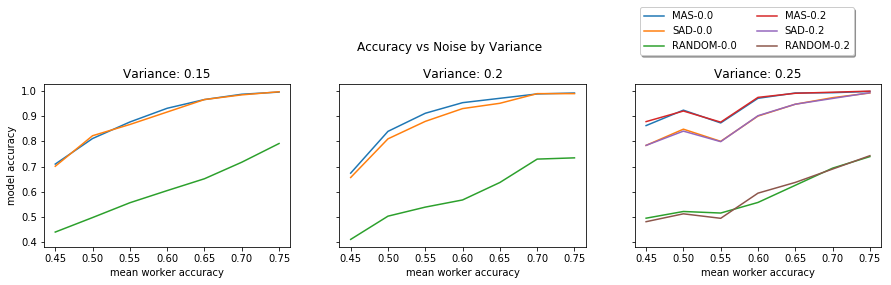

In [24]:
plot_noise_and_variance('dog')